In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from number_of_experimetns import calculate_number_of_replicas
from experimenter_knative import experiment_with
sns.set_theme()

In [2]:
# Maximum number of replicas that the system can manage.
MAX_REPLICA_COUNT = 200

# Number of experiments
NUMBER_OF_EXPERIMENTS = 5

# Each experiment will be done by this many times for consistency.
EXPERIMENT_PROOF = 7

# Int array of replicas for each experiment
REPLICAS: np.ndarray = calculate_number_of_replicas(MAX_REPLICA_COUNT, NUMBER_OF_EXPERIMENTS)

# How much should we wait for the kubernetes api to be stabilized
COOLDOWNS: np.ndarray = 10 * np.ones((NUMBER_OF_EXPERIMENTS,), dtype=int) + (REPLICAS * 0.004).astype(int)

# Namespace of the experimentation
NAMESPACE = "experiments"

# Driver used in kubectl
DRIVER = "minikube"

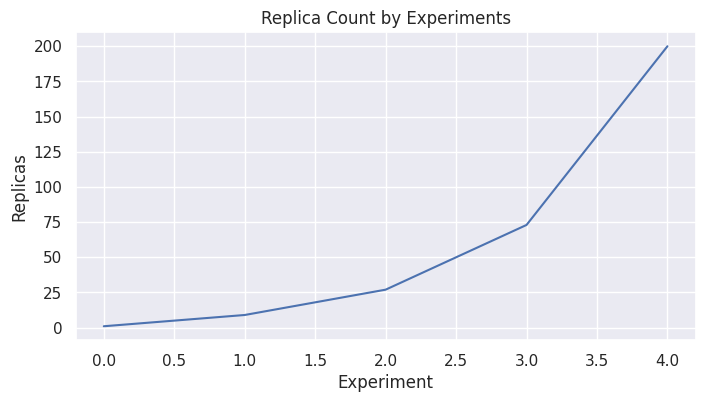

[10 10 10 10 10]
[  1   9  27  73 200]


In [3]:
def draw_replicas(replicas=REPLICAS):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(replicas)), replicas)
    plt.title("Replica Count by Experiments")
    plt.xlabel("Experiment")
    plt.ylabel("Replicas")
    plt.show()

draw_replicas()
print(COOLDOWNS)
print(REPLICAS)

In [5]:
# Do the experiment
experiment_with(REPLICAS.tolist(), NAMESPACE, COOLDOWNS.tolist(), EXPERIMENT_PROOF, DRIVER)

Estimated time 565 second(s)
Experiment of 7 step(s) with 1 replica(s) in 'knative' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 119 second(s)
